# Exploratory Data Analysis

In [1]:
for text_no, text in enumerate([line.rstrip() for line in open('train.csv')][:5]):
    print(text_no, text)
    print('\n')

0 "note : some may consider portions of the following text to be spoilers .  be forewarned .  it's startling to consider that it was only a few years ago that film distributors would worriedly rearrange their summer release schedules in order to give the annual disney animated feature juggernaut a wide berth .  the lion king had just cracked $300 million domestic in gross to become one of the most profitable ventures in film history , continuing to build on a sturdy base left by prior flicks aladdin and beauty and the beast .  since then , though , disney's animated features have shown an unbroken string of diminishing returns , with pocahontas , the hunchback of notre dame , and this year's hercules successively proving less and less potent .  with the once seemingly-impregnable disney stranglehold on the market share suddenly looking mighty vulnerable , and faced with their first serious competition in the animated film market from fox's anastasia , disney has brought xmas home early

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('train.csv',sep='\t',names=[ "text"])
train['label']=train['text'].apply(lambda x: x[-1])
train['length'] = train['text'].apply(len)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1400 non-null   object
 1   label   1400 non-null   object
 2   length  1400 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 32.9+ KB


In [4]:
val=pd.read_csv('val.csv',sep='\t',names=[ "text"])
val['label']=val['text'].apply(lambda x: x[-1])
val['length'] = val['text'].apply(len)
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    200 non-null    object
 1   label   200 non-null    object
 2   length  200 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [5]:
test=pd.read_csv('test.csv',sep='\t',names=[ "text"])
test['label']=test['text'].apply(lambda x: x[-1])
test['length'] = test['text'].apply(len)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    400 non-null    object
 1   label   400 non-null    object
 2   length  400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


Text(0.5, 1.0, 'Train Data')

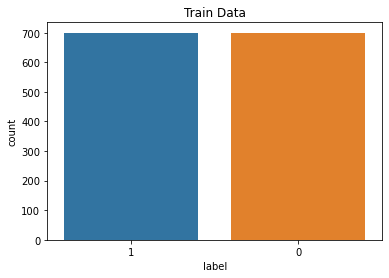

In [27]:
sns.countplot(data=train,x='label').set_title('Train Data')

Text(0.5, 1.0, 'Validation Data')

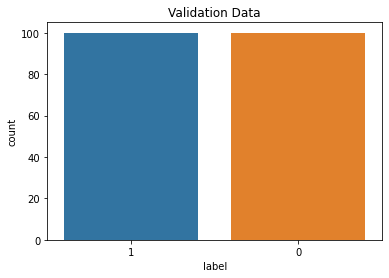

In [28]:
sns.countplot(data=val,x='label').set_title('Validation Data')

Text(0.5, 1.0, 'Test Data')

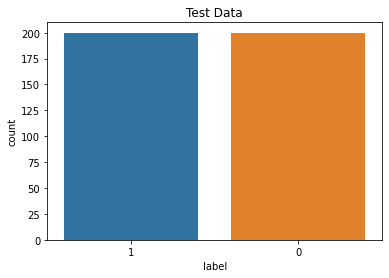

In [29]:
sns.countplot(data=test,x='label').set_title('Test Data')

# Text Preprocessing

In [9]:
#Download required nltk resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [10]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

def text_preprocessing(text):
    lemma=WordNetLemmatizer()
    # 1. Remove Punctuation
    remove_punctuation = [first_word for first_word in text if first_word not in string.punctuation]
    remove_punctuation = ''.join(remove_punctuation)
    # 2. Remove Stopwords
    remove_stopword = [second_word for second_word in remove_punctuation.split() if second_word.lower() not in stopwords.words('english')]
    # 3. Return Lemmatized List
    return [lemma.lemmatize(third_word) for third_word in remove_stopword]

# Bag of Words and Vectorization with CountVectorizer and TFIDF

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
features=pd.concat([train['text'],val['text']]).to_frame('text').reset_index().drop(['index'],1)
labels=pd.concat([train['label'],val['label']]).to_frame('label').reset_index().drop(['index'],1)

features['label']=labels['label']

In [13]:
X_CV=CountVectorizer(analyzer=text_preprocessing).fit_transform(features['text'])
X_tfidf = TfidfTransformer().fit_transform(X_CV)

In [14]:
X_train=X_tfidf[0:1400]
X_val=X_tfidf[1400:]
Y_train=features['label'].iloc[0:1400]
Y_val=features['label'].iloc[1400:]

# Model Training and Prediction with Naive Bayes Algorithm

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

text_classification_model = MultinomialNB().fit(X_train, Y_train)

predicted_labels = text_classification_model.predict(X_val)
#print(predicted_labels)

print ('WITH NAIVE BAYES')
print('\n')
print (f'ACCURACY SCORE: {accuracy_score(Y_val, predicted_labels)*100}%')
print('\n')
print (f'CONFUSION MATRIX: {confusion_matrix(Y_val, predicted_labels)}')
print('\n')
print (f'CLASSIFICATION REPORT: {classification_report(Y_val, predicted_labels)}')

WITH NAIVE BAYES


ACCURACY SCORE: 82.0%


CONFUSION MATRIX: [[78 22]
 [14 86]]


CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.80      0.86      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



# Model Training and Prediction with SVM Algorithm

In [16]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,Y_train)
svc_predictions=svc.predict(X_val)
#print(svc_predictions)

print ('WITH SVM')
print('\n')
print (f'ACCURACY SCORE: {accuracy_score(Y_val, svc_predictions)*100}%')
print('\n')
print (f'CONFUSION MATRIX: {confusion_matrix(Y_val, svc_predictions)}')
print('\n')
print(f'CLASSIFICATION REPORT: {classification_report(Y_val, svc_predictions)}')

WITH SVM


ACCURACY SCORE: 86.5%


CONFUSION MATRIX: [[84 16]
 [11 89]]


CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.85      0.89      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



# SVM Hyper-Parameters Tuning with GridSearch 5-folds Cross-Validation

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,Y_train)

gridsearch_predictions = grid.predict(X_val)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.879, total=   3.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.836, total=   3.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.875, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.843, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.782, t

In [18]:
print ('WITH SVM AFTER HYPERPARAMETRS TUNING')
print('\n')
print(f'BEST HYPERPARAMETRS: {grid.best_params_}')
print('\n')
print (f'ACCURACY SCORE: {accuracy_score(Y_val, gridsearch_predictions)*100}%')
print('\n')
print (f'CONFUSION MATRIX: {confusion_matrix(Y_val, gridsearch_predictions)}')
print('\n')
print(f'CLASSIFICATION REPORT: {classification_report(Y_val,gridsearch_predictions)}')

WITH SVM AFTER HYPERPARAMETRS TUNING


BEST HYPERPARAMETRS: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


ACCURACY SCORE: 92.0%


CONFUSION MATRIX: [[92  8]
 [ 8 92]]


CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.92      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



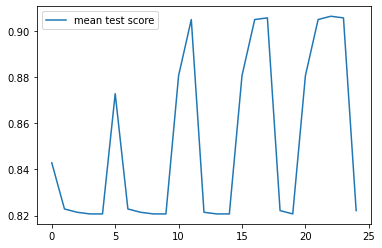

In [19]:
plt.plot(grid.cv_results_['mean_test_score'],label='mean test score')
plt.legend()

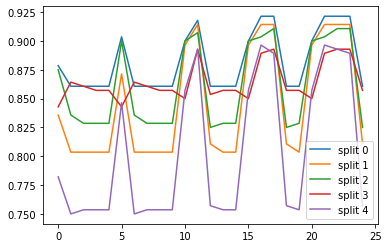

In [20]:
plt.plot(grid.cv_results_['split0_test_score'],label='split 0')
plt.plot(grid.cv_results_['split1_test_score'],label='split 1')
plt.plot(grid.cv_results_['split2_test_score'],label='split 2')
plt.plot(grid.cv_results_['split3_test_score'],label='split 3')
plt.plot(grid.cv_results_['split4_test_score'],label='split 4')
plt.legend()

In [21]:
# With an accuracy score of 92.0%, the SVM alogorithm after Gridsearch 5-folds crosss validation seems to be the most accurate solution. I'll be testing this algorithm with the test dataset.

# Testing Preferred Alogorithm with the Test Dataset

In [22]:
features_test=pd.concat([train['text'],test['text']]).to_frame('text').reset_index().drop(['index'],1)
labels_test=pd.concat([train['label'],test['label']]).to_frame('label').reset_index().drop(['index'],1)
features_test['label']=labels_test['label']

X_tfidf_test = TfidfTransformer().fit_transform(CountVectorizer(analyzer=text_preprocessing).fit_transform(features_test['text']))

X_tr=X_tfidf_test[0:1400]
X_test=X_tfidf_test[1400:]
Y_tr=features_test['label'].iloc[0:1400]
Y_test=features_test['label'].iloc[1400:]

svc_test=SVC(C=1000,kernel='rbf',gamma=0.01)
svc_test.fit(X_tr,Y_tr)
svc_test_predictions=svc_test.predict(X_test)
#print(svc_test_predictions)

print ('WITH TEST DATASET AFTER CHOOSING PREFERRED PARAMETERS AND ALGORITHM')
print('\n')
print (f'ACCURACY SCORE: {accuracy_score(Y_test, svc_test_predictions)*100}%')
print('\n')
print (f'CONFUSION MATRIX: {confusion_matrix(Y_test, svc_test_predictions)}')
print('\n')
print(f'CLASSIFICATION REPORT: {classification_report(Y_test, svc_test_predictions)}')

WITH TEST DATASET AFTER CHOOSING PREFERRED PARAMETERS AND ALGORITHM


ACCURACY SCORE: 87.5%


CONFUSION MATRIX: [[175  25]
 [ 25 175]]


CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.88      0.88      0.88       200
           1       0.88      0.88      0.88       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [23]:
#Testing the algorithm and tuned parameters on an unknown dataset gave an impressive accuracy score of 87.5% with only 50 total cases of a type 1 and 2 error